# M02 Notes

In [1]:
import pandas as pd
import numpy as np

In [2]:
%%html
<style>
table {float: left; clear: right;}
td, th {text-align:right;}
</style>

# Review Assignment

See [M01 Notebook](../M01_GettingStarted/M01_ImportHello.ipynb) for results.

# Activities

**Activity 1**
- Which Python do you have? [View](https://ontoligent.github.io/DS5100-2024-01-O/modules/m02/m02-activity-hello-world.html)
- Do you have Anaconda?

**Activity 2**
- Running Jupyter Lab [View](https://ontoligent.github.io/DS5100-2024-01-O/modules/m02/m02-activity-jupyter-lab-on-rivanna.html)
- Running VSCode


# Concepts

## Data / Code

Data vs algorithm (code). How are they related?

## Data types and structures

Data types and data structures. What are the differences?

Data types are atomic; they don't contain other data types.

A data structure contains data types organized in a certain way.

## Strings

Strings are data types, but internally they are like data structures.

However, unlike the data structures considered here, strings can't contain any of the data types specified by Python.

Internally, a string is a sequence of Unicode code points, which are not exposed as data types (as they are in some other languages).

- A code point is a numerical value that maps to a specific character.
- Unicode is an international standard of code points that map onto the alphabets of many languages.

Each character is an element in an immutable list-like structure.

You can access it's elements as if it were a tuple of characters:

In [3]:
my_string = "This is a string"
print(my_string[0])
print(my_string[-1])
print(my_string[1:-1])
print(my_string[1:4])
print(my_string[1:-4])
print(my_string[-4:1])

T
g
his is a strin
his
his is a st



But also like a tuple, you can't change its values:

In [4]:
my_string[2] = 'a'
my_string[3] = 't'

TypeError: 'str' object does not support item assignment

Note that some languages, like Java, have a data type for individual characters, e.g. `A`.

## String indexing

Note that strings can be accessed via indexes, since they are list-like sequences.

Every positive number has a corresponding negative number, and these may be \
substituted freely and using indexes and slices.

Slices have to be expressed using numbers going from left to right.

The following example illustrates these points.

In [5]:
my_string2 = "I AM A STRING"

The above string can represented in the following way:

|I| |A|M| |A| |S|T|R|I|N|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
| 0| 1| 2| 3| 4| 5| 6| 7| 8| 9| 10| 11| 12|
|-13|-12|-11|-10|-9|-8|-7|-6|-5|-4|-3|-2|-1|

Note that the second and third rows of this table represent two functionally \
equivalent ways of accessing elements of the string sequence.

Also note that positive and negative numbers are subsitutible.

In [6]:
print(my_string2[12], '==', my_string2[-1])

G == G


In [7]:
my_string2[2:6]

'AM A'

In [8]:
my_string2[2:-7]

'AM A'

In [9]:
my_string2[-11:-7]

'AM A'

In [10]:
my_string2[-11:6]

'AM A'

Note that you can go backwards, too, with the step paramater after the second colon.

The default value is 1.

In [40]:
my_string2[10:1:-1]

'IRTS A MA'

In [12]:
my_string2[::2]

'IA  TIG'

## Mutability

A mutable object is a data structure whose internal values can be changed. 

For example, tuples are immutable, lists are not.

**Demonstration**

Here, we mutate a list by appending a value to it.

In [13]:
a = [1,2,3,4,5]
a.append(10)
print(a)

[1, 2, 3, 4, 5, 10]


In [14]:
a[0] = 5
print(a)

[5, 2, 3, 4, 5, 10]


If we try the same things with a tuple, we get an error.

In [15]:
b = (1,2,3,4,5)
b.append(10)
print(b)

AttributeError: 'tuple' object has no attribute 'append'

In [16]:
b[0] = 5
print(b)

TypeError: 'tuple' object does not support item assignment

This, on the other hand, is not mutation:

In [17]:
a = [1,2,3,4,5,10] # A list
b = (1,2,3,4,5,10) # A tuple
print(a)
print(b)

[1, 2, 3, 4, 5, 10]
(1, 2, 3, 4, 5, 10)


We are just **re-assigning** a new value to the variable. 

The new value just **replaces** the old one.

In mutation, the same data structure remains in place but its contents are changed.

Note, however, that this works with tuples:

In [18]:
b += (11,)
print(b)

(1, 2, 3, 4, 5, 10, 11)


It looks like mutation, but it's not.

This is because we are replacing `b` with a new tuple value.

> Notice that we write a single valued tuple with a comma. Why?

**Behavior**

> View [the video](https://canvas.its.virginia.edu/courses/104595/modules/items/970266) for this topic on Canvas.
                                    
Relatedly, mutable and immutable objects behave differently.

For example, when you assign a variable to another variable of a \
mutable datatype, any changes to the data are reflected by both variables. 

The new variable is just an alias for the old variable. 

This is only true for mutable datatypes. 

Lets explore how `+` operator behaves differently.

First, let's create a function that will allow us\
to compare the objects as we modify them.

In [19]:
def compare_objects(trial:int, obj1:str, obj2:str):
    o1 = eval(obj1)
    o2 = eval(obj2)
    print(f"t{trial} {obj1} {o1} {id(o1)}")
    print(f"t{trial} {obj2} {o2} {id(o2)}")
    print(f"{obj1} == {obj2}:", o1 == o2)

**List t1**

We initialize a list and make a copy of it.\
Note that the two variables share the same `id`.

In [20]:
a0 = [1,2,3,4,5]
a1 = a0 # Make a copy of a list
compare_objects(1, 'a0', 'a1')

t1 a0 [1, 2, 3, 4, 5] 140486786318976
t1 a1 [1, 2, 3, 4, 5] 140486786318976
a0 == a1: True


**List t2**

Now we add to the copy and note the effects on the original. \
The original value is also changed. \
This is because both variables point to the same object.

In [21]:
a1 += [12] # Extend the copy
compare_objects(2, 'a0', 'a1')

t2 a0 [1, 2, 3, 4, 5, 12] 140486786318976
t2 a1 [1, 2, 3, 4, 5, 12] 140486786318976
a0 == a1: True


**List t3**

Note, however, that if we _don't_ use the unary operator,\
then `a1` becomes a different object!

Lutz goes into the difference between the += and the + in [Ch 11 pages 360-363](https://learning.oreilly.com/library/view/learning-python-5th/9781449355722/ch11.html#augmented_assignments).

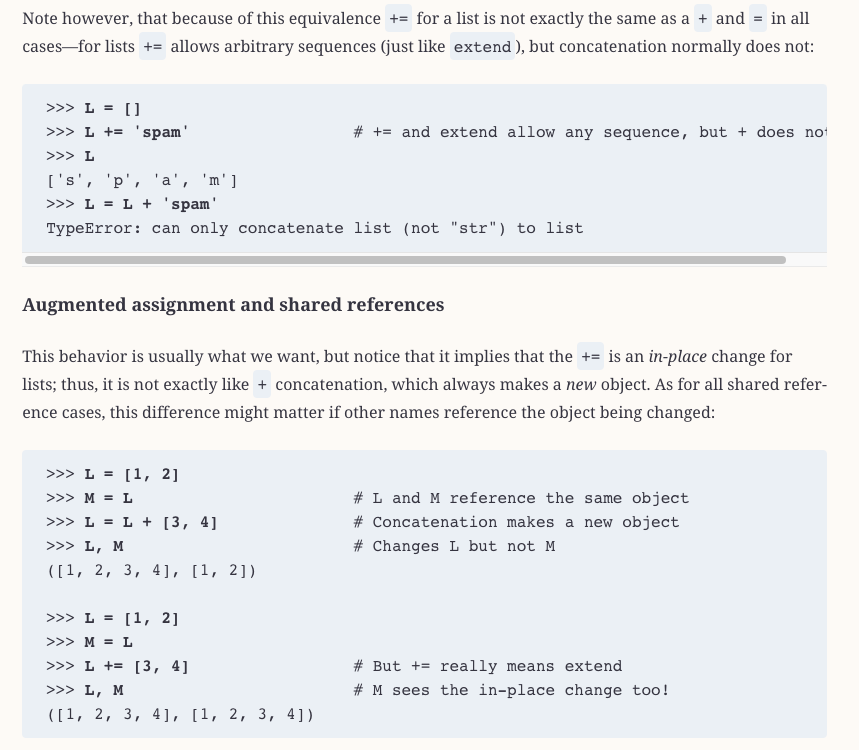

In [22]:
a1 = a1 + [12] # Extend the copy
compare_objects(3, 'a0', 'a1')

t3 a0 [1, 2, 3, 4, 5, 12] 140486786318976
t3 a1 [1, 2, 3, 4, 5, 12, 12] 140485791147584
a0 == a1: False


**List t4**

Try it with a new object copy, to avoid any possible inference between `t2` and `t3`.

In [23]:
a2 = a0
a2 = a2 + [12] # Extend the copy
compare_objects(4, 'a0', 'a2')

t4 a0 [1, 2, 3, 4, 5, 12] 140486786318976
t4 a2 [1, 2, 3, 4, 5, 12, 12] 140485791151296
a0 == a2: False


We get the same result.

**Tuple t1**

Let's try this with a tuple.\
We see again that both variables have the same `id`.

In [24]:
b0 = (1,2,3,4,5)
b1 = b0 # Make a copy of a tuple
compare_objects(1, 'b0', 'b1')

t1 b0 (1, 2, 3, 4, 5) 140485791255184
t1 b1 (1, 2, 3, 4, 5) 140485791255184
b0 == b1: True


**Tuple t2**

However, if extend the tuple with the unary operator,\
&emsp;`b1` becomes a new object.\
Note how this differs from the list behavior.

In [25]:
b1 += (12,) # Extend the copy
compare_objects(2, 'b0', 'b1')

t2 b0 (1, 2, 3, 4, 5) 140485791255184
t2 b1 (1, 2, 3, 4, 5, 12) 140485791104832
b0 == b1: False


**Tuple t3**

If we don't use the unary operator, the same thing happens again.\
The value of `b1` becomes a new object because the variable has been reassigned.

In [26]:
b1 = b1 + (12,) # Extend the copy
compare_objects(3, 'b0', 'b1')

t3 b0 (1, 2, 3, 4, 5) 140485791255184
t3 b1 (1, 2, 3, 4, 5, 12, 12) 140485791318080
b0 == b1: False


Let's look at another example.

Here is a list:

In [27]:
foo = ['hi']
bar = foo
compare_objects(1, 'foo', 'bar')

t1 foo ['hi'] 140485791149952
t1 bar ['hi'] 140485791149952
foo == bar: True


In [28]:
bar += ['bye']
compare_objects(2, 'foo', 'bar')

t2 foo ['hi', 'bye'] 140485791149952
t2 bar ['hi', 'bye'] 140485791149952
foo == bar: True


In [29]:
bar = bar + ['bye']
compare_objects(2, 'foo', 'bar')

t2 foo ['hi', 'bye'] 140485791149952
t2 bar ['hi', 'bye', 'bye'] 140485791173504
foo == bar: False


And here is a tuple:

In [30]:
foo1 = ('hi')
bar1 = foo1
compare_objects(1, 'foo1', 'bar1')

t1 foo1 hi 140486835502896
t1 bar1 hi 140486835502896
foo1 == bar1: True


In [31]:
bar1 += ('bye')
compare_objects(2, 'foo1', 'bar1')

t2 foo1 hi 140486835502896
t2 bar1 hibye 140485792814832
foo1 == bar1: False


## Comparing floats

Let's do an experiment:

In [32]:
f1 = 0.1 + 0.2
f2 = 0.3

In [35]:
f1 == f2

False

In the above case, `f1` and `f2` don't hold precisely the same value because of the limitations of representing base-10 fractions in base-2 (binary).

Inspecting their values, we find minor differences in the lower significant digits:

In [36]:
f1, f2

(0.30000000000000004, 0.3)

To get around this problem, try using `math.isclose()` instead of `==`:

In [37]:
import math
math.isclose(f1, f2)

True

Note that sometimes floating point comparisons _do_ work:

In [38]:
f3 = 4.0
f4 = 3.5 + .5

In [39]:
f3 == f4

True

See the [Wikipedia](https://en.wikipedia.org/wiki/Floating-point_arithmetic#:~:text=In%20computing%2C%20floating%2Dpoint%20arithmetic,are%20called%20floating%2Dpoint%20numbers.) article on floating point arithmetic to learn more about how this arises. 

It will provide you with insight into how computers actually work as machines that process numbers.

## The word "scalar"

Sometimes you will see the word "scalar" in the literature to refer to certain kinds of values.

Scalars are **single values** as opposed to structures or collections of values. 

> Strings as data types sometimes behave as scalars and sometimes as sequential structures.

# Summary

**Types**
| name | type | literal |
|------|------|---------|
| `int` | integer | `1` |
| `str` | string | `"1"`, `'1'` |
| `float` | floating point (real) | `1.` |
| `complex` | complex | `1j` (imaginary component) |
| `bool` | boolean | `True` |

**Structures**
| name | mutable | constructor |
|------|---------|-------------|
| `tuple` | no | `()`, `tuple()` |
| `list` | yes | `[]`, `list()` |
| `dict` | yes | `{}` with key/value pairs, `dict()`  |
| `set` | yes | `{}` with single values, `set()` |